# SAES for Multiobjective Optimization algorithms Benchmarking

This notebook provides an example of how to use the SAES library. As case study, we will use the data of the paper "[On the automatic design of multi-objective particle swarm optimizers: experimentation and analysis](https://doi.org/10.1007/s11721-023-00227-2)", published in Swarm Intelligence in 2023. In this paper, a comparative study of multi-objective particle swarm optimizers (MOPSO) is conducted, where four of MOPSO variants are compared with algorithms NSGAII, SMPSO and OMOPSO. The computed metrics for performace assessment are six multi-objective quality indicators: EP (additive epsilon), GD (generational distance), SP (spacing), HV (hypervolume), NHV (normalized hypervolume), IGD (inverted generational distance) and IGD+ (inverted generational distance plus). All theses metrics are intended to be minimized but the HV.  

To use SAES, two files CSV files with the following contents are required:
- Metric names and whether they have to be maximized or not
- Experiment data: algorithm, instance, MetricName, executionID, and MetricValue

We use the files called `multiobjectiveMetrics.csv` and `swarmIntelligence.csv` in this example, and we will use them to illustrate the main features of SAES: boxplot, LaTeX tables and critical distance graph generation.

## Load the Data

In [ ]:
from SAES.latex_generation.stats_table import Friedman
from SAES.plots.boxplot import Boxplot
from SAES.plots.cdplot import CDplot
from SAES.plots.violin import Violin
from SAES.plots.histoplot import HistoPlot

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

In [16]:
# Load the experiment data
experimentData = pd.read_csv('swarmIntelligence.csv')
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,0.020829
1,NSGAII,ZDT1,EP,1,0.021411
2,NSGAII,ZDT1,EP,2,0.020636
3,NSGAII,ZDT1,EP,3,0.023344
4,NSGAII,ZDT1,EP,4,0.025894
...,...,...,...,...,...
14695,AutoMOPSOZ,DTLZ7,IGD+,20,0.001598
14696,AutoMOPSOZ,DTLZ7,IGD+,21,0.001605
14697,AutoMOPSOZ,DTLZ7,IGD+,22,0.001601
14698,AutoMOPSOZ,DTLZ7,IGD+,23,0.001596


In [17]:
# Compared algoritms
algorithms = experimentData.Algorithm
list(algorithms.unique())

['NSGAII',
 'SMPSO',
 'OMOPSO',
 'AutoMOPSOD',
 'AutoMOPSOW',
 'AutoMOPSORE',
 'AutoMOPSOZ']

In [18]:
experimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Algorithm    14700 non-null  object 
 1   Instance     14700 non-null  object 
 2   MetricName   14700 non-null  object 
 3   ExecutionId  14700 non-null  int64  
 4   MetricValue  14700 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 574.3+ KB


In [19]:
experimentData

,Algorithm,Instance,MetricName,ExecutionId,MetricValue
0,NSGAII,ZDT1,EP,0,0.020829
1,NSGAII,ZDT1,EP,1,0.021411
2,NSGAII,ZDT1,EP,2,0.020636
3,NSGAII,ZDT1,EP,3,0.023344
4,NSGAII,ZDT1,EP,4,0.025894
...,...,...,...,...,...
14695,AutoMOPSOZ,DTLZ7,IGD+,20,0.001598
14696,AutoMOPSOZ,DTLZ7,IGD+,21,0.001605
14697,AutoMOPSOZ,DTLZ7,IGD+,22,0.001601
14698,AutoMOPSOZ,DTLZ7,IGD+,23,0.001596


In [20]:
# Load the metrics (quality indicators) data
metrics = pd.read_csv('multiobjectiveMetrics.csv')
metrics

,MetricName,Maximize
0,EP,False
1,SP,False
2,GD,False
3,HV,True
4,NHV,False
5,IGD,False
6,IGD+,False


## Boxplot Graph

A **boxplot**, also known as a **box-and-whisker plot**, is a graphical tool used to summarize and visualize the distribution of a dataset. It allows you to identify key features such as central tendency, variability, and the presence of outliers, offering a simple way to interpret the data.

The **main body of the boxplot** is the box, which represents the **interquartile range (IQR)**, the range between the first quartile (**Q1**) and the third quartile (**Q3**). This area contains the middle 50% of the data. Inside the box, a line indicates the **median** (second quartile, **Q2**), the value that divides the data into two equal halves. The **whiskers** extend from the box to the smallest and largest values that are within 1.5 times the IQR from Q1 or Q3, respectively. Points outside this range are considered **outliers** and are often shown as individual points.

The **interpretation of the boxplot** depends on the context and the goal of the analysis. If the goal is to **maximize** a metric (such as profit or performance), attention should be paid to the higher values, both within the box and in the upper whiskers or outliers. On the other hand, if the goal is to **minimize** (such as errors or costs), the focus should be on the lower values. Additionally, the position of the median within the box can indicate the skewness of the data: if it is closer to Q1 or Q3, the distribution is not symmetrical.

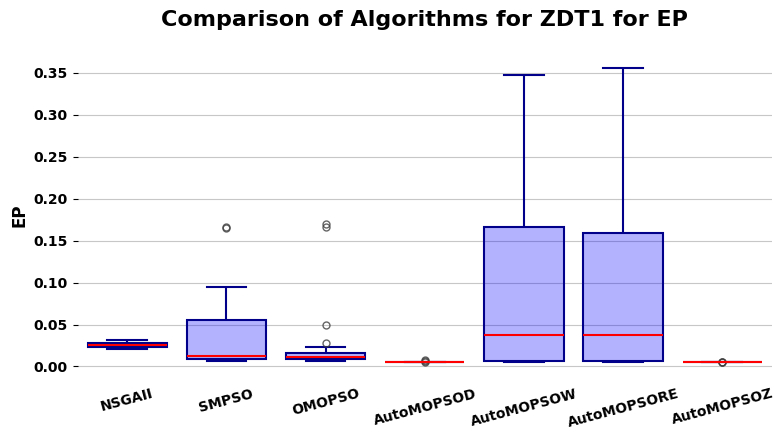

In [21]:
boxplot = Boxplot(experimentData, metrics, 'EP')
boxplot.show_instance('ZDT1')

In [22]:
for instance in boxplot.instances:
    boxplot.save_instance(instance, f"{os.getcwd()}/outputs/boxplot")

[2025-03-14 15:00:42,037] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_ZDT1.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:42,271] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_ZDT2.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:42,732] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_ZDT3.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:42,948] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_ZDT4.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:43,164] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_ZDT6.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:43,362] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_DTLZ1.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:43,572] [SAES.plots.boxplot] [INFO] Boxplot boxplot_EP_DTLZ2.png saved to /home/khaosdev/SAES/notebooks/outputs/boxplot
[2025-03-14 15:00:43,794] [SAES.plots.b

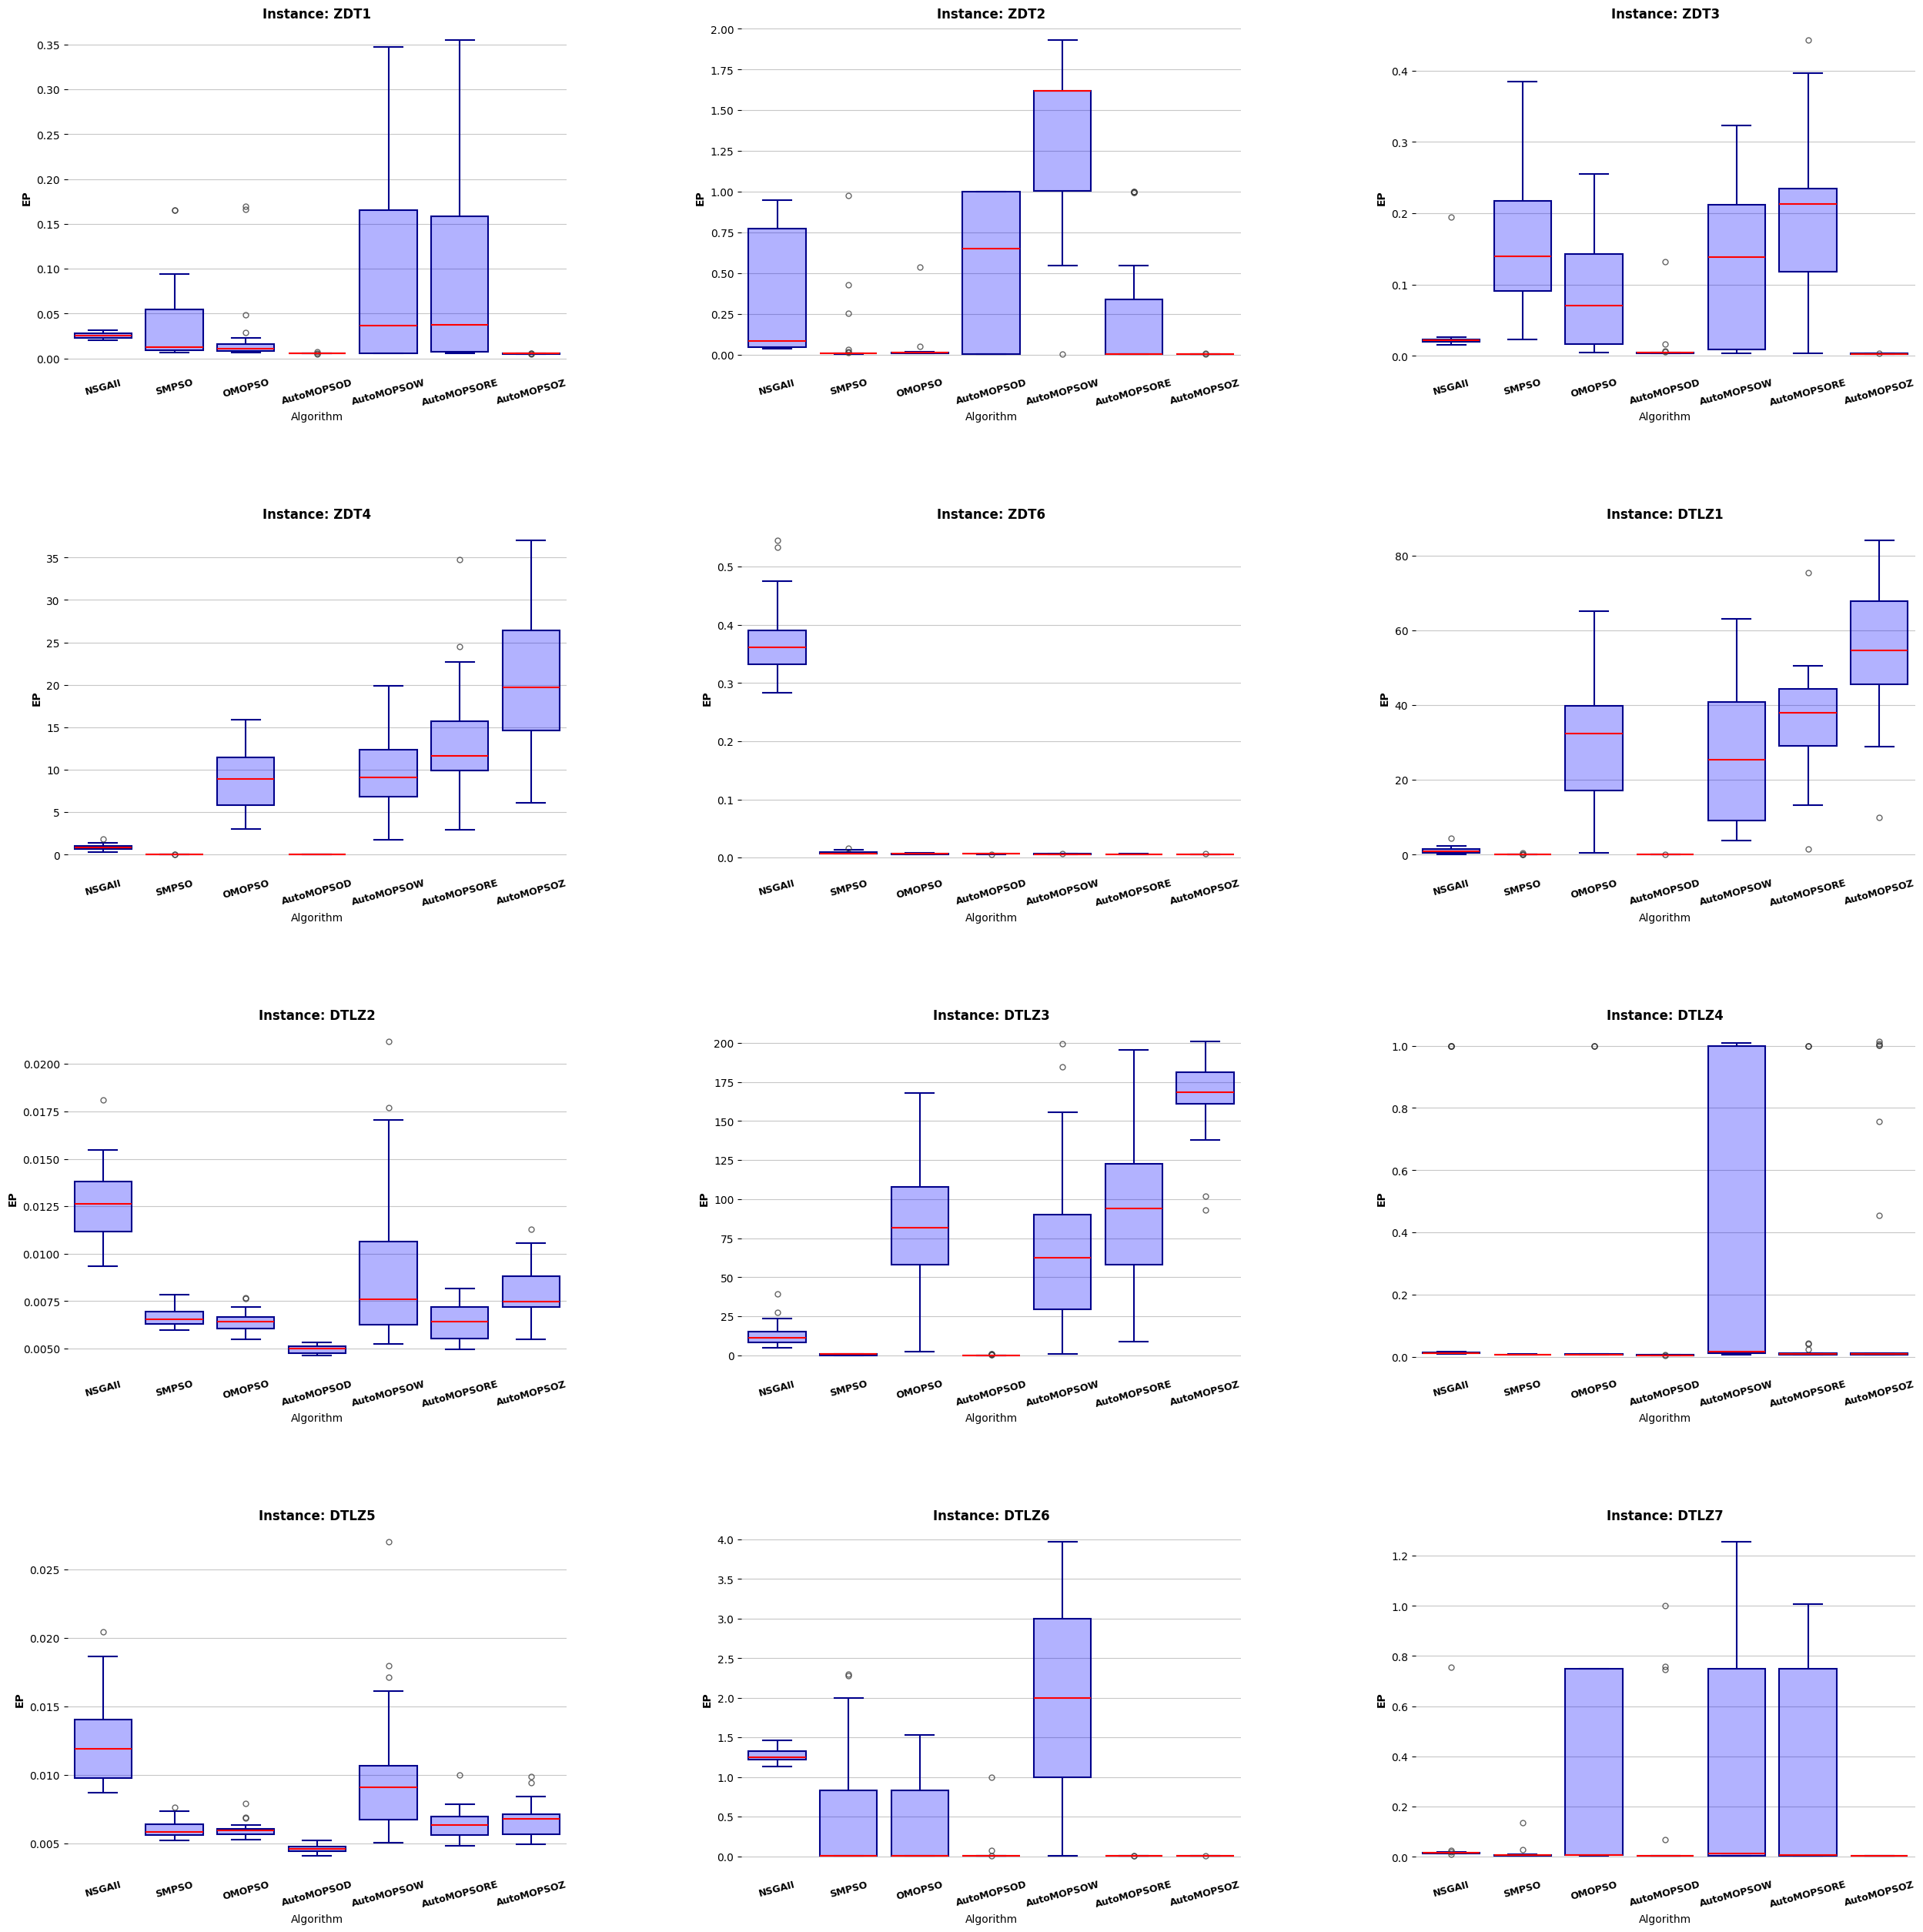

In [23]:
# Show all the boxplots for all the instances
boxplot.show_all_instances()

## Violin Plot

A **violin plot** is another graphical tool used to visualize the distribution of a dataset, combining aspects of both a **boxplot** and a **density plot**. It is particularly useful for understanding the distribution of data, especially when comparing multiple groups or datasets.

The **main feature of a violin plot** is its **shape**, which is formed by a **kernel density estimation (KDE)** that shows the probability distribution of the data. The plot looks like a violin because it is symmetric on both sides of a central axis, with the width at different values indicating the density of data points at that value.

Here are the key components of a violin plot:

1. **Central axis**: Like a boxplot, a violin plot has a central axis where the data is plotted. This axis typically represents the variable of interest.
   
2. **Density curve (the "violin" shape)**: The main part of the violin plot is the **density curve**, which shows how the data is distributed along the axis. Wider sections of the curve indicate higher density (more data points), while narrower sections indicate lower density (fewer data points). The shape helps to visualize the distribution more clearly than a boxplot alone, especially when there are multiple peaks (modes) in the data.

3. **Boxplot within the violin**: A **boxplot** is often included inside the violin plot, showing the **median**, **first quartile (Q1)**, and **third quartile (Q3)**. The whiskers of the boxplot often extend to the smallest and largest values within 1.5 times the IQR, and any data points outside this range are considered outliers.

4. **Individual data points (optional)**: Some violin plots also show individual data points as dots or other markers, providing an additional layer of detail.

### **Interpretation of a Violin Plot**:
- **Shape**: The overall shape of the violin gives insights into the distribution of the data. A symmetrical violin suggests a roughly normal distribution, while asymmetrical shapes can indicate skewness.
- **Peaks**: The presence of multiple peaks in the violin indicates that the data may have multiple modes, or subgroups, within it.
- **Width**: The width of the violin at various values provides a clear indication of the data's **density**—wider areas mean higher data concentration, and narrower areas mean less concentration.
- **Boxplot features**: The boxplot part of the violin allows you to see the **median**, **quartiles**, and **outliers**, giving a summary of the spread and central tendency of the data.

Violin plots are particularly useful when comparing multiple distributions side-by-side, as they provide both a summary and a detailed visualization of the data's distribution.

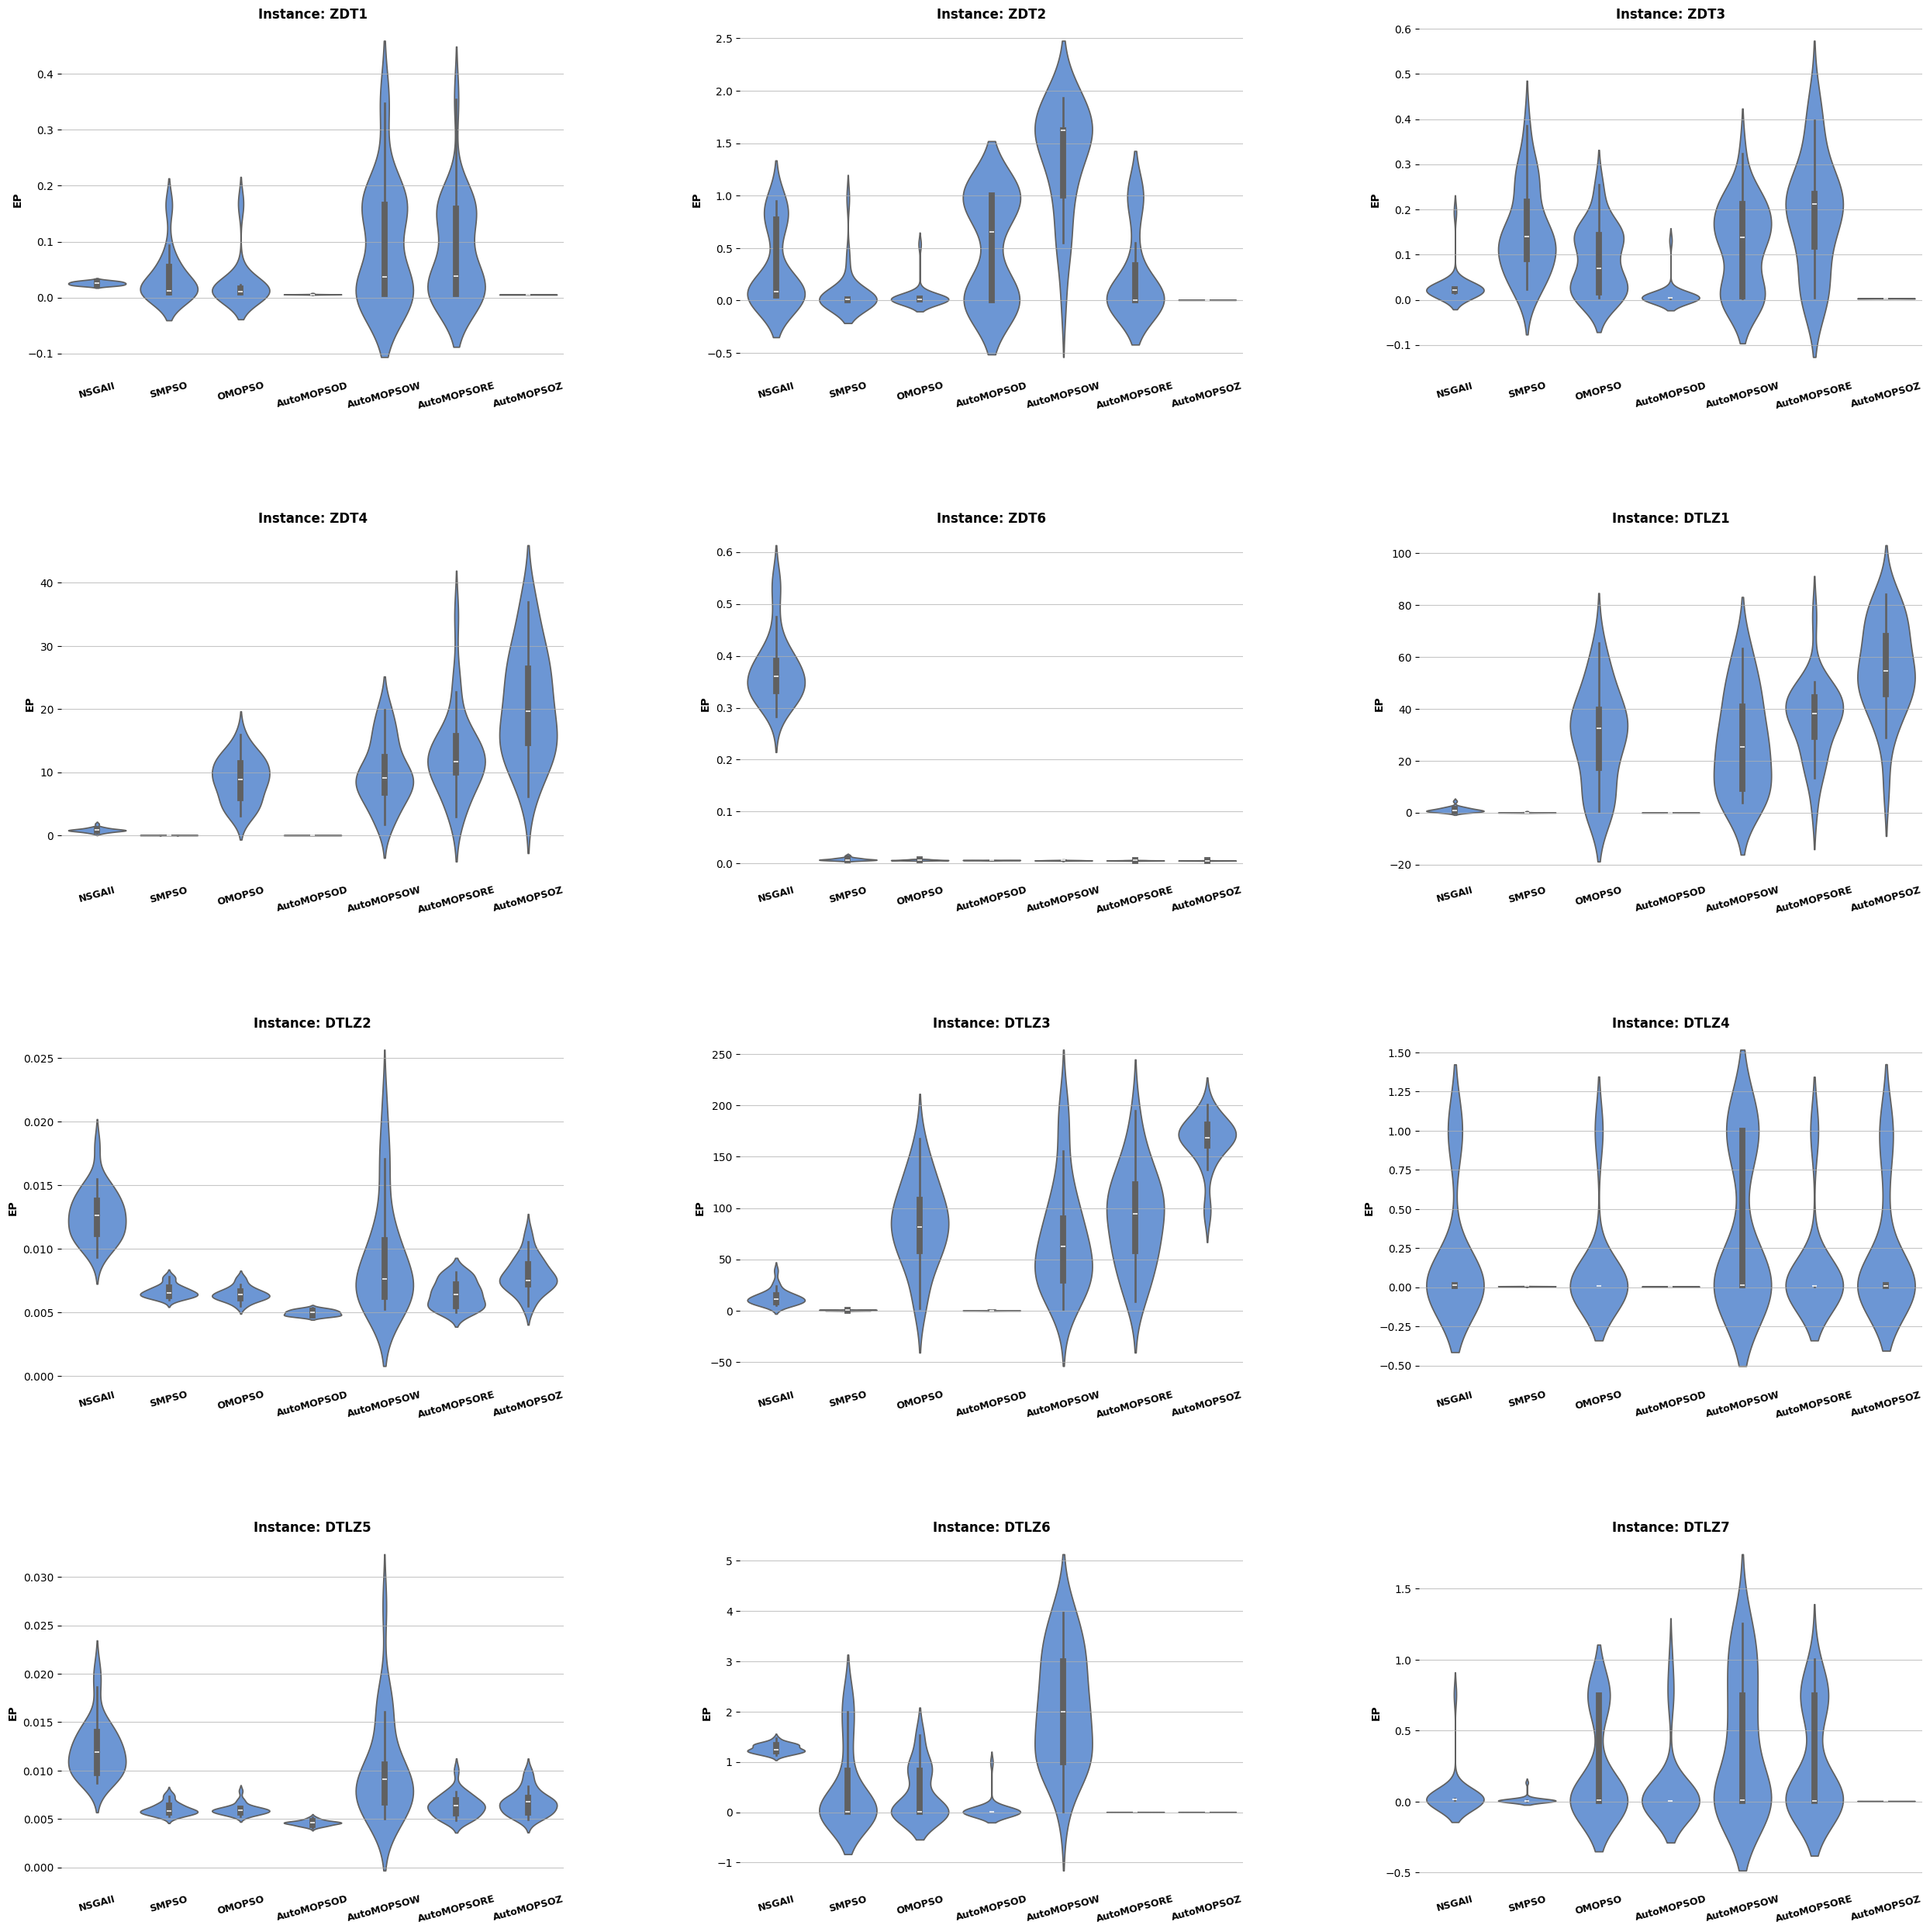

In [24]:
violin = Violin(experimentData, metrics, "EP")
violin.show_all_instances()

## HistPlot

A **histogram** (or **histoplot**) is another graphical representation used to summarize the distribution of a dataset, but it differs from a boxplot in how it organizes and displays the data.

In a **histogram**, the data is divided into **bins** or **intervals**, and the frequency of data points within each interval is represented by the height of a bar. The **x-axis** represents the values or ranges of the dataset (the bins), while the **y-axis** represents the frequency or count of data points within each bin. This type of plot is particularly useful for understanding the **shape** of the data distribution, including whether the data is **skewed**, **normal**, or exhibits any other patterns.

### Key Features of a Histogram:
1. **Bins**: The data is grouped into bins, and the number of bins can affect the appearance of the histogram. Too few bins may oversimplify the distribution, while too many bins may make the plot noisy and harder to interpret. The size of the bins often depends on the range of the data and the level of detail desired.
   
2. **Frequency**: The height of each bar corresponds to the number of data points within that bin. A taller bar indicates a higher frequency of data in that range.

3. **Shape of Distribution**: The histogram visually reveals the overall shape of the distribution. For example, a bell-shaped histogram suggests that the data is normally distributed, while a skewed histogram indicates that the data is not symmetrically distributed.

4. **Outliers**: Unlike the boxplot, histograms don't explicitly highlight outliers, but you can identify outliers as bins with significantly lower frequencies compared to neighboring bins. If a bin is far from the main body of the distribution, it might suggest the presence of unusual data points.

### Interpretation:
- **Skewness**: If the histogram's tail is stretched out on the right, it suggests **right skewness** (or positive skew), indicating that the data has more values on the lower end but some very high values. Conversely, if the tail is stretched out on the left, it suggests **left skewness** (or negative skew).
  
- **Peaks**: A histogram with one peak is **unimodal**, while one with multiple peaks could be **multimodal**, suggesting that the dataset may consist of more than one underlying distribution.

- **Central Tendency**: You can visually identify the central tendency (such as the mean or median) by looking at where the majority of the data is concentrated. In symmetric distributions, the mean and median are close to each other.

- **Spread**: The width of the histogram gives an idea of the spread of the data. A wider histogram indicates more variability, while a narrower one suggests that the data points are more tightly grouped around the central tendency.

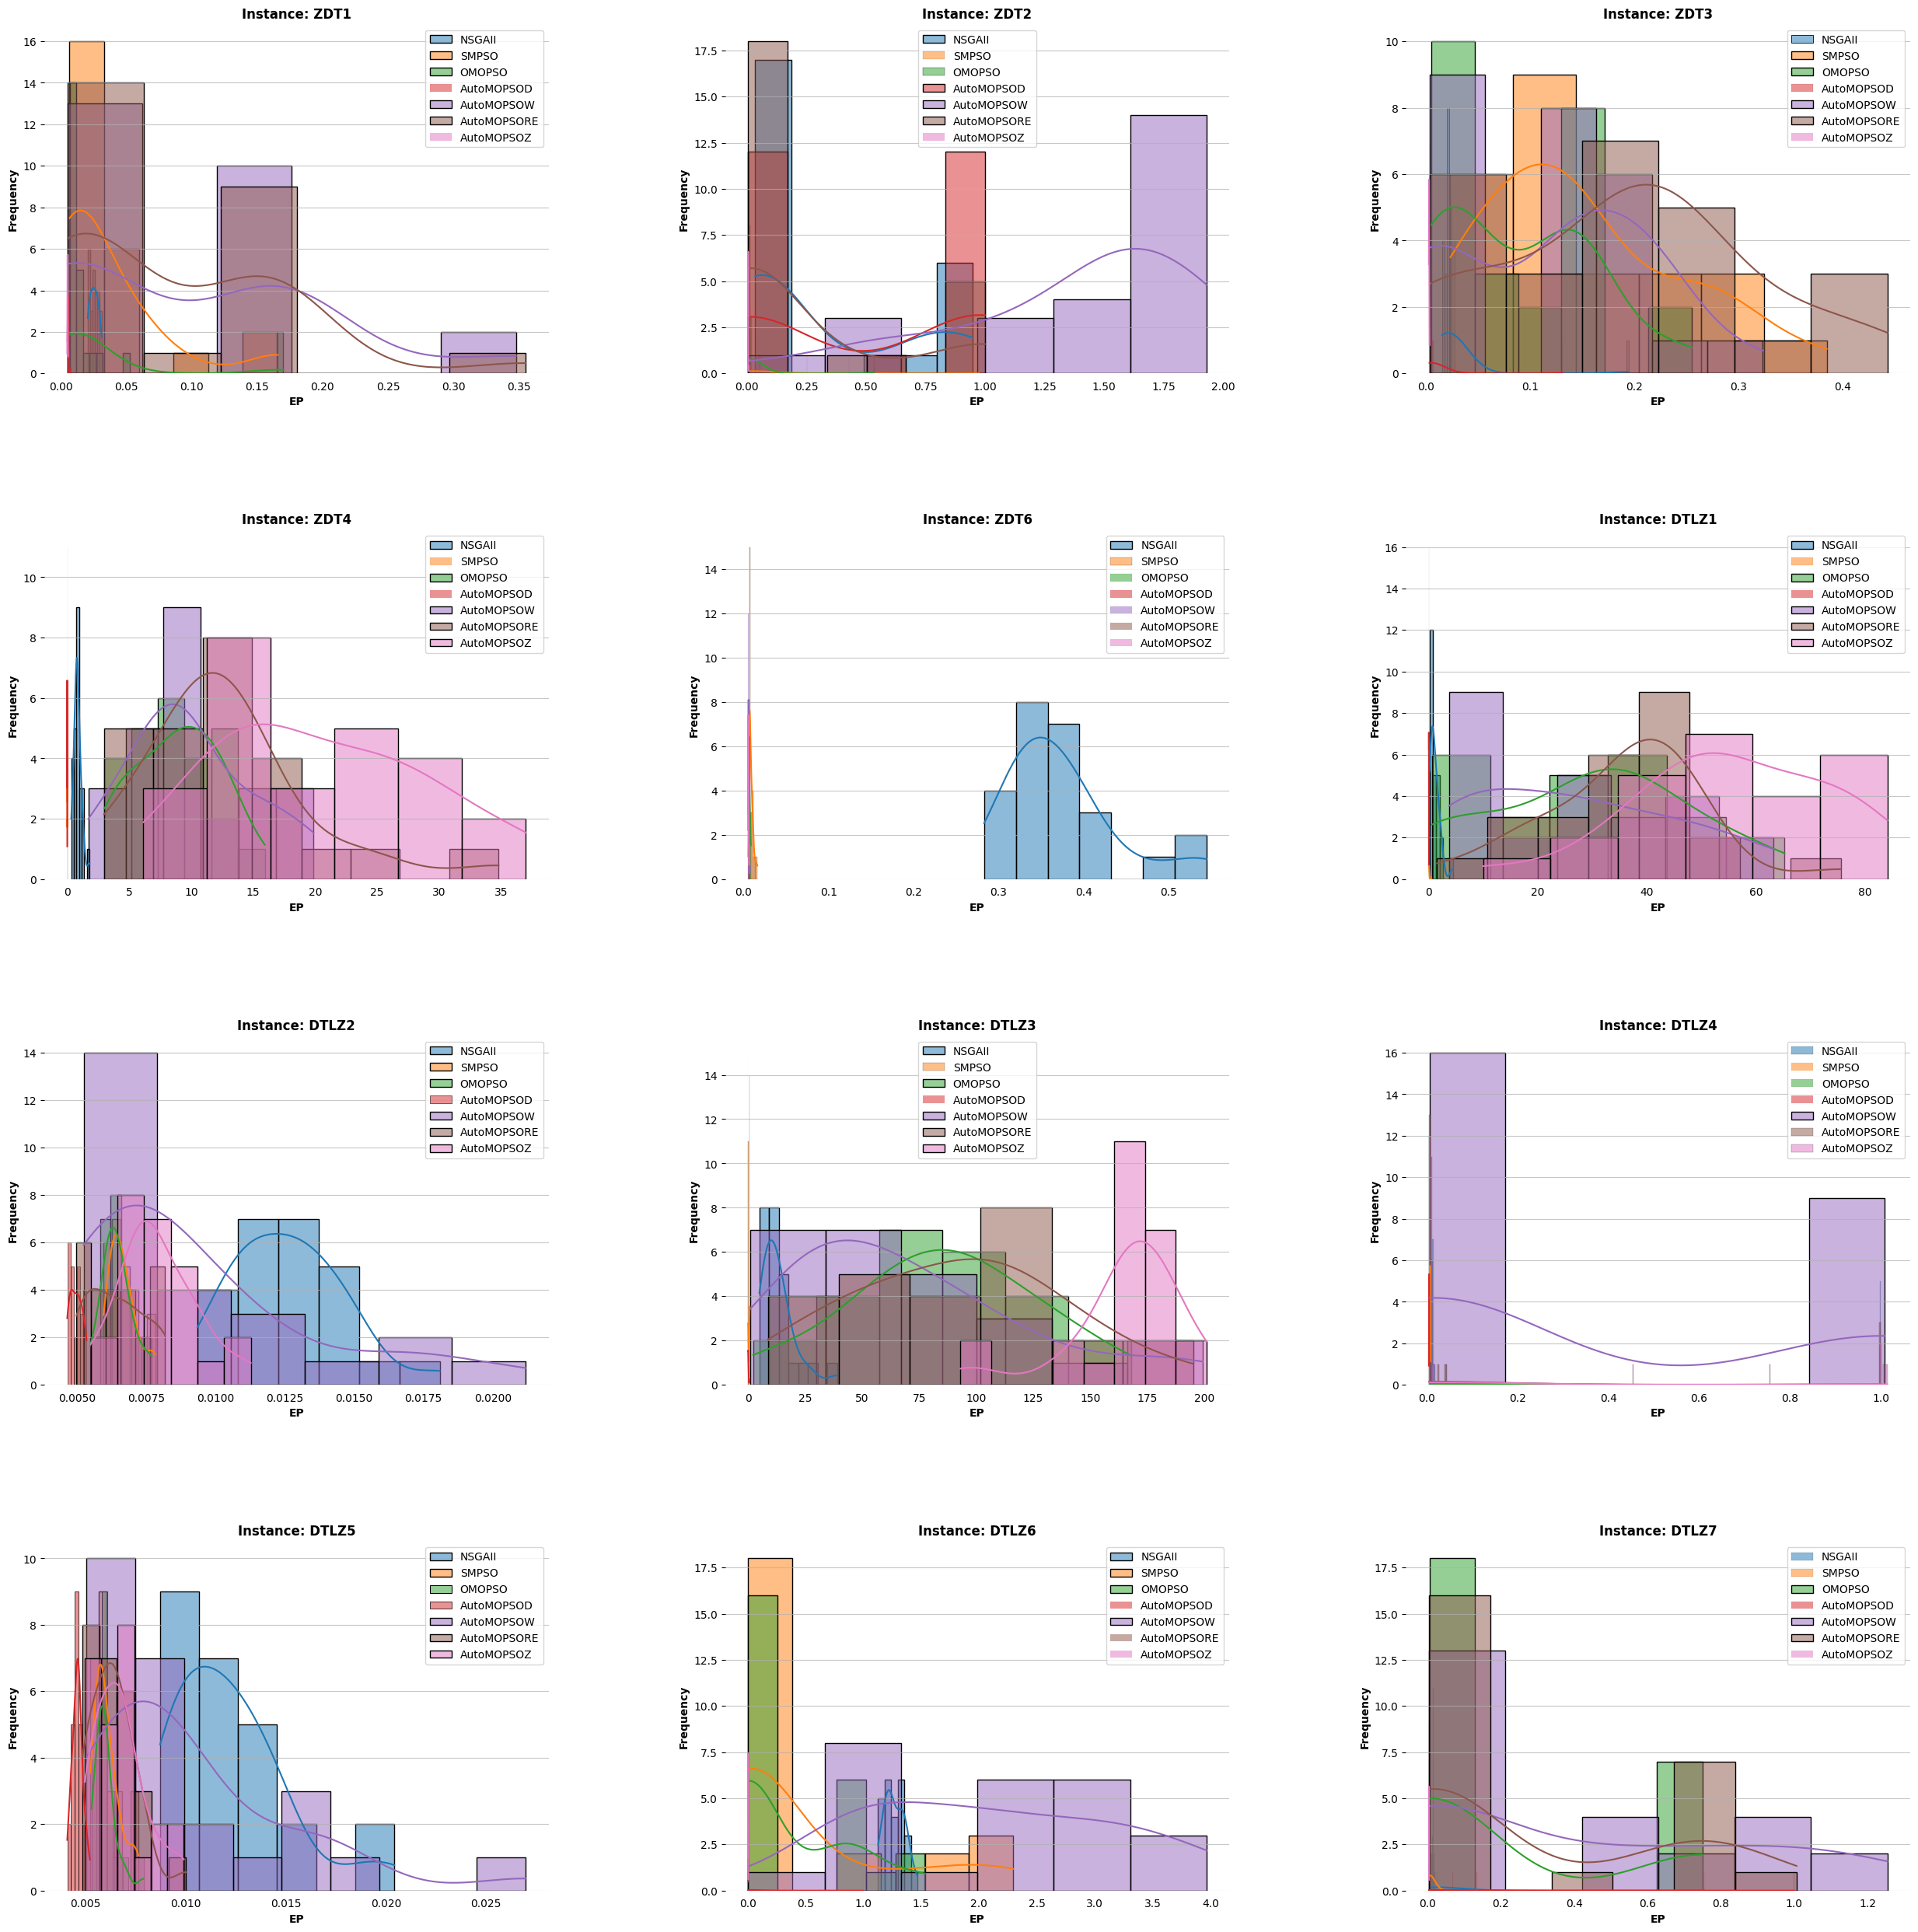

In [25]:
histoplot = HistoPlot(experimentData, metrics, "EP")
histoplot.show_all_instances()

## Critical Distance Graph

A critical distance (CD) graph is used to compare the performance of multiple algorithms statistically. It is typically generated using the Nemenyi test, which is a post-hoc test applied after a Friedman test has shown significant differences between algorithms. 

In this graph:
- Each algorithm is assigned a rank based on its performance on a metric (e.g., accuracy, hypervolume, etc.) across multiple datasets or experiments.
- The average rank of each algorithm is plotted on a horizontal axis.
- A critical distance (CD) value is calculated, representing the threshold for statistically significant differences between algorithm ranks.
- Algorithms connected by horizontal lines are statistically indistinguishable within the critical distance, meaning their performance differences are not significant at the chosen confidence level.

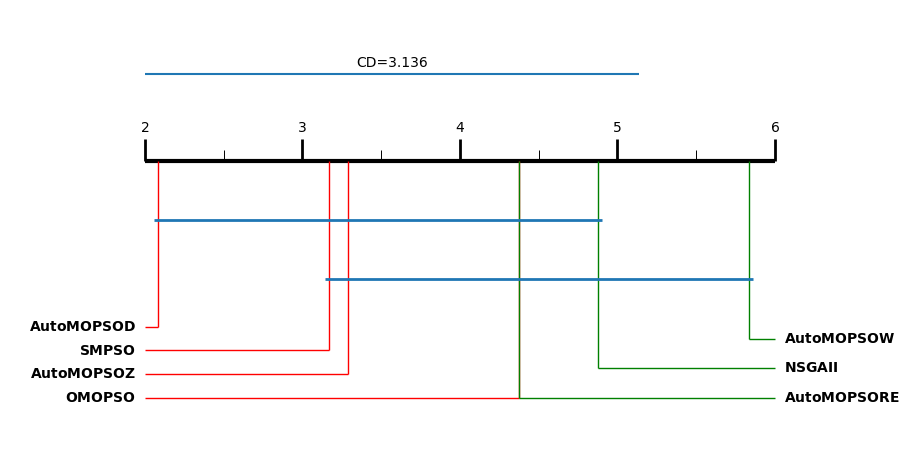

In [26]:
cdplot = CDplot(experimentData, metrics, 'HV')
cdplot.show()

### Interpretation of the Provided Critical Distance Graph

This graph compares multiple multi-objective optimization algorithms (e.g., NSGAII, AutoMOPSOW, SMPSO, etc.) based on their performance in maximizing the hypervolume metric.

#### Key Observations:
1. **Critical Distance (CD):**
   - The CD is 3.136, as shown at the top of the graph. Algorithms whose ranks differ by less than 2.670 are not significantly different in performance.

2. **Ranking of Algorithms:**
   - The x-axis represents the average rank of each algorithm. Lower ranks are better, indicating better performance.
   - The red group (AutoMOPSOD, SMPSO, etc) has lower ranks, suggesting they perform better in minimizing hypervolume compared to the red group (NSGAII, AutoMOPSORE, etc.).

3. **Critical Distance line:**
   - The key aspect of this graph are the blue critical distance lines. They connect algorithms whose distance is lower than the critical distance (CD), meaning that those connedted have a performance statistically indistinguishable. 
   - For example, in the red group we have AutoMOPSOD which is the leader in rank. However its performance is statistically indistinguishable to AutoMOPSORE from the green group because they are connected through a blue line.

#### Summary:
The critical distance graph demonstrates that:
- Within each group (red or green), the algorithms perform similarly, with no statistically significant differences.
- Algorithms from different groups connedted by the blue line are statistically indistinguishable from one another.

## LaTeX report Generation

Lastly, we offer a variety of LaTeX reports tailored for different purposes, including scientific articles and presentations (take into account that only the .tex source code is provided and you will need an external tool like overleaf to render the LaTeX code into pdf format). Below are the four types of LaTeX reports you can generate, along with a brief explanation of each:  

1. **Median Table**  
   - **Description**: Displays the median results of the experimental data in a structured tabular format.  
   - **Purpose**: Useful for summarizing central tendencies of your results and providing a quick overview.  
   - **Use Case**: Suitable for basic comparative analysis in situations where medians are the primary focus.

2. **Median Table with Friedman Test**  
   - **Description**: Extends the median table by incorporating the Friedman test results.  
   - **Purpose**: Highlights significant differences among multiple groups or algorithms, assuming a non-parametric distribution.  
   - **Use Case**: Ideal for analyzing and reporting results where ranking of methods or treatments is necessary.  

3. **Median Table with Wilcoxon Pairwise Test (Pivot-Based)**  
   - **Description**: Combines the median table with the results of Wilcoxon signed-rank pairwise tests using a pivot-based approach.  
   - **Purpose**: Provides insights into pairwise comparisons of the experimental groups relative to a designated pivot group.  
   - **Use Case**: Valuable for scenarios requiring focused comparisons against a baseline or reference algorithm.  

4. **Pairwise Wilcoxon Test Table (1-to-1 Comparison)**  
   - **Description**: Presents pairwise Wilcoxon signed-rank test results for direct 1-to-1 comparisons between groups.  
   - **Purpose**: Offers detailed insights into individual pair comparisons without the need for a pivot.  
   - **Use Case**: Suitable for comprehensive pairwise statistical analysis in experimental studies.  

In [27]:
friedman = Friedman(experimentData, metrics, 'HV')
friedman.save(f"{os.getcwd()}/outputs/friedman")
friedman.show()

[2025-03-14 15:01:06,609] [SAES.latex_generation.stats_table] [INFO] Friedman base_HV.tex table saved to /home/khaosdev/SAES/notebooks/outputs/friedman


,NSGAII,SMPSO,OMOPSO,AutoMOPSOD,AutoMOPSOW,AutoMOPSORE,AutoMOPSOZ,Friedman
ZDT1,6.3817e-01,6.5698e-01,6.5635e-01,6.6209e-01,6.2227e-01,6.1364e-01,6.6211e-01,+
ZDT2,2.9175e-01,3.2770e-01,3.2215e-01,4.2080e-02,0.0000e+00,3.2876e-01,3.2885e-01,+
ZDT3,4.9701e-01,4.1863e-01,4.6840e-01,5.1575e-01,3.9088e-01,3.1726e-01,5.1600e-01,+
ZDT4,1.3925e-01,6.5996e-01,0.0000e+00,6.6195e-01,0.0000e+00,0.0000e+00,0.0000e+00,+
ZDT6,1.6329e-01,4.0105e-01,4.0126e-01,4.0140e-01,4.0145e-01,4.0147e-01,4.0148e-01,+
DTLZ1,0.0000e+00,4.9324e-01,0.0000e+00,4.9464e-01,0.0000e+00,0.0000e+00,0.0000e+00,+
DTLZ2,2.0854e-01,2.0968e-01,2.0925e-01,2.1098e-01,2.0605e-01,2.0851e-01,2.0693e-01,+
DTLZ3,0.0000e+00,8.5786e-02,0.0000e+00,2.0573e-01,0.0000e+00,0.0000e+00,0.0000e+00,+
DTLZ4,2.0850e-01,2.0966e-01,2.0809e-01,2.1098e-01,1.9253e-01,2.0635e-01,2.0595e-01,+
DTLZ5,2.1025e-01,2.1134e-01,2.1108e-01,2.1262e-01,2.0588e-01,2.1052e-01,2.0909e-01,+


As it was mentioned, what is generated is the LaTeX code. You would need an external tool or have LaTeX installed in your system but if you did render it you would obtain a pdf document with (in this case) a friedman table like this:

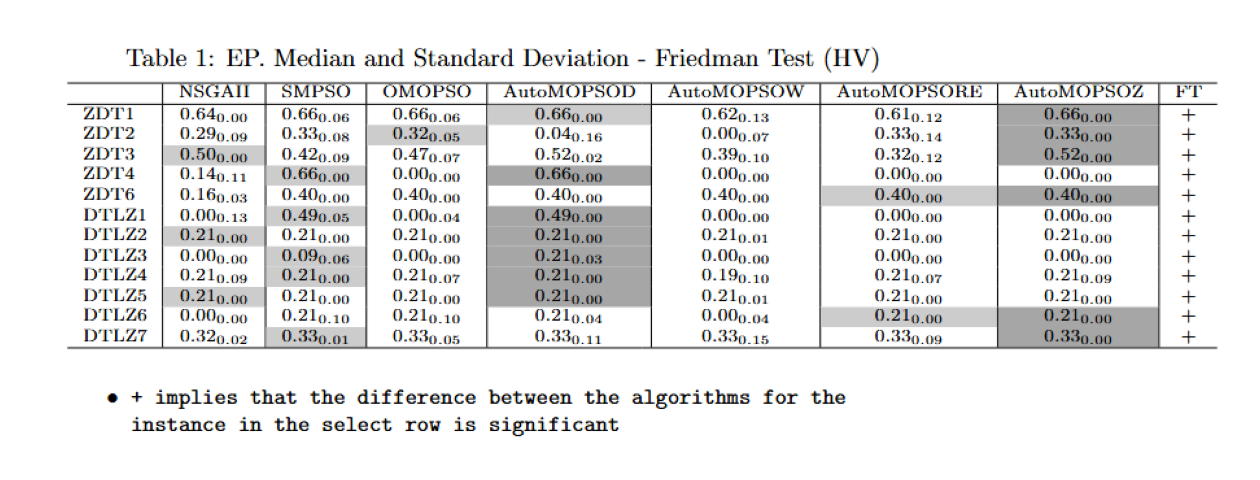

In [28]:
img = Image.open("friedman_HV.png")
plt.figure(figsize=(16, 16))

plt.imshow(img)
plt.axis('off')  
plt.show()